In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score, make_scorer, fbeta_score, mean_absolute_error, roc_curve, auc
from tabulate import tabulate

In [2]:
df = pd.read_csv("nba-1976-2025-vorp.csv")
df = df.sort_values(by="Rk", ascending=True)

In [3]:
df.head()

,Rk,Player,VORP,Season,Age,Team,G,GS,AS,MP,...,PF,PTS,FG%,2P%,3P%,FT%,TS%,eFG%,Pos,All_Star
0,1,Michael Jordan,12.5,1987-88,24,CHI,82,82.0,1,3311,...,270,2868,0.535,0.546,0.132,0.841,0.603,0.537,G-F,1
1,2,LeBron James,11.8,2008-09,24,CLE,81,81.0,1,3054,...,139,2304,0.489,0.535,0.344,0.780,0.591,0.530,F-G,1
2,3,Michael Jordan,11.4,1988-89,25,CHI,81,81.0,1,3255,...,247,2633,0.538,0.553,0.276,0.850,0.614,0.546,G-F,1
3,4,David Robinson,11.4,1993-94,28,SAS,80,80.0,1,3241,...,228,2383,0.507,0.510,0.345,0.749,0.577,0.510,C,1
4,5,Michael Jordan,10.8,1990-91,27,CHI,82,82.0,1,3034,...,229,2580,0.539,0.551,0.312,0.851,0.605,0.547,G-F,1


In [4]:
df.describe()

,Rk,VORP,Age,G,GS,AS,MP,FG,FGA,2P,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,TS%,eFG%,All_Star
count,20828.000000,20828.000000,20828.000000,20828.000000,19676.000000,20828.000000,20828.000000,20828.000000,20828.000000,20828.000000,...,20533.000000,20828.000000,20828.000000,20754.000000,20702.000000,17145.000000,20145.000000,20762.000000,20754.000000,20828.000000
mean,10414.500000,0.637949,26.528471,53.539994,25.921885,0.058911,1260.673804,205.503505,442.904360,175.778807,...,77.799104,115.330805,541.418379,0.444325,0.472028,0.263691,0.728871,0.515306,0.477219,0.058911
std,6012.670039,1.353791,4.071716,25.341357,29.368260,0.235464,913.211935,185.674024,386.556372,170.775200,...,67.934999,79.915986,492.909795,0.093408,0.101129,0.166648,0.140089,0.092295,0.096374,0.235464
min,1.000000,-2.600000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5207.750000,-0.100000,23.000000,34.000000,1.000000,0.000000,410.000000,50.000000,116.000000,38.000000,...,21.000000,45.000000,130.000000,0.407000,0.434000,0.167000,0.667000,0.483000,0.443000,0.000000
50%,10414.500000,0.100000,26.000000,61.000000,11.000000,0.000000,1182.000000,159.000000,350.000000,125.000000,...,61.000000,111.000000,415.000000,0.447000,0.476000,0.310000,0.750000,0.525000,0.484000,0.000000
75%,15621.250000,1.000000,29.000000,76.000000,52.000000,0.000000,2005.000000,314.000000,678.000000,264.000000,...,117.000000,174.000000,826.000000,0.490000,0.517000,0.368000,0.817000,0.562000,0.523000,0.000000
max,20828.000000,12.500000,44.000000,87.000000,83.000000,1.000000,3638.000000,1098.000000,2279.000000,1086.000000,...,464.000000,386.000000,3041.000000,1.000000,1.000000,1.000000,1.000000,1.500000,1.500000,1.000000


In [5]:
df.shape

(20828, 35)

<h3>Data Cleaning</h3>

In [6]:
df.isnull().sum()

Rk             0
Player         0
VORP           0
Season         0
Age            0
Team           0
G              0
GS          1152
AS             0
MP             0
FG             0
FGA            0
2P             0
2PA            0
3P           860
3PA          860
FT             0
FTA            0
ORB            0
DRB            0
TRB            0
AST            0
STL            0
BLK            0
TOV          295
PF             0
PTS            0
FG%           74
2P%          126
3P%         3683
FT%          683
TS%           66
eFG%          74
Pos            0
All_Star       0
dtype: int64

In [7]:
# Replace missing values of GS as 0
df["GS"] = df["GS"].fillna(0)

# Replace missing values of 3P as 0
df["3P"] = df["3P"].fillna(0)

# Replace missing values of 3PA as 0
df["3PA"] = df["3PA"].fillna(0)

# Replace missing values of TOV as 0
df["TOV"] = df["TOV"].fillna(0)

In [8]:
# Calculate missing values of FG%
df["FG%"] = df["FG%"].fillna(df["FG"] / df["FGA"])

# Calculate missing values of 3P%
df["3P%"] = df["3P%"].fillna(df["3P"] / df["3PA"])

# Calculate missing values of FT%
df["FT%"] = df["FT%"].fillna(df["FT"] / df["FTA"])

In [9]:
# Calculate missing values of TS%
df["TS%"] = df["TS%"].fillna(df["PTS"] / (2 * (df["FGA"] + 0.44 * df["FTA"])))

In [10]:
# Calculate missing values of eFG%
df["eFG%"] = df["eFG%"].fillna((df["FG"] + 0.5 * df["3P"]) / df["FGA"])

In [11]:
# Replace rest of missing values as 0
df = df.fillna(0)

In [12]:
df.isnull().sum()

Rk          0
Player      0
VORP        0
Season      0
Age         0
Team        0
G           0
GS          0
AS          0
MP          0
FG          0
FGA         0
2P          0
2PA         0
3P          0
3PA         0
FT          0
FTA         0
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
FG%         0
2P%         0
3P%         0
FT%         0
TS%         0
eFG%        0
Pos         0
All_Star    0
dtype: int64

In [13]:
df = df.drop_duplicates()

<h3>Feature Engineering</h3>

In [14]:
# Points per Game (PPG)
df["PPG"] = df["PTS"] / df["G"]

# 3PTS per Game (3PG)
df["3PG"] = df["3P"]  / df["G"]

# Rebounds per Game (RPG)
df["RPG"] = df["TRB"] / df["G"]

# Assists per Game (APG)
df["APG"] = df["AST"] / df["G"]

# Steals per Game (SPG)
df["SPG"] = df["STL"] / df["G"]

# Blocks per Game (BPG}
df["BPG"] = df["BLK"] / df["G"]

# TOV per Game (TPG)
df["TPG"] = df["TOV"] / df["G"]

In [15]:
df.head()

,Rk,Player,VORP,Season,Age,Team,G,GS,AS,MP,...,eFG%,Pos,All_Star,PPG,3PG,RPG,APG,SPG,BPG,TPG
0,1,Michael Jordan,12.5,1987-88,24,CHI,82,82.0,1,3311,...,0.537,G-F,1,34.975610,0.085366,5.475610,5.914634,3.158537,1.597561,3.073171
1,2,LeBron James,11.8,2008-09,24,CLE,81,81.0,1,3054,...,0.530,F-G,1,28.444444,1.629630,7.567901,7.246914,1.691358,1.148148,2.975309
2,3,Michael Jordan,11.4,1988-89,25,CHI,81,81.0,1,3255,...,0.546,G-F,1,32.506173,0.333333,8.049383,8.024691,2.888889,0.802469,3.580247
3,4,David Robinson,11.4,1993-94,28,SAS,80,80.0,1,3241,...,0.510,C,1,29.787500,0.125000,10.687500,4.762500,1.737500,3.312500,3.162500
4,5,Michael Jordan,10.8,1990-91,27,CHI,82,82.0,1,3034,...,0.547,G-F,1,31.463415,0.353659,6.000000,5.524390,2.719512,1.012195,2.463415


<h3>EDA</h3>

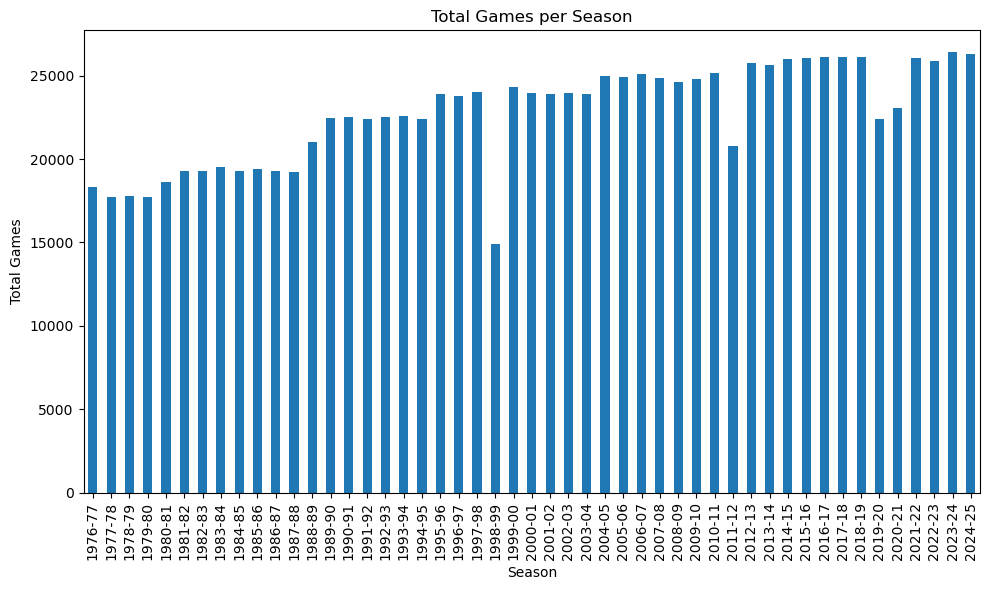

In [16]:
# Group by Season and sum Games
season_games = df.groupby("Season")["G"].sum()

# Plot
season_games.plot(kind = "bar", figsize = (10, 6))
plt.xlabel("Season")
plt.ylabel("Total Games")
plt.title("Total Games per Season")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

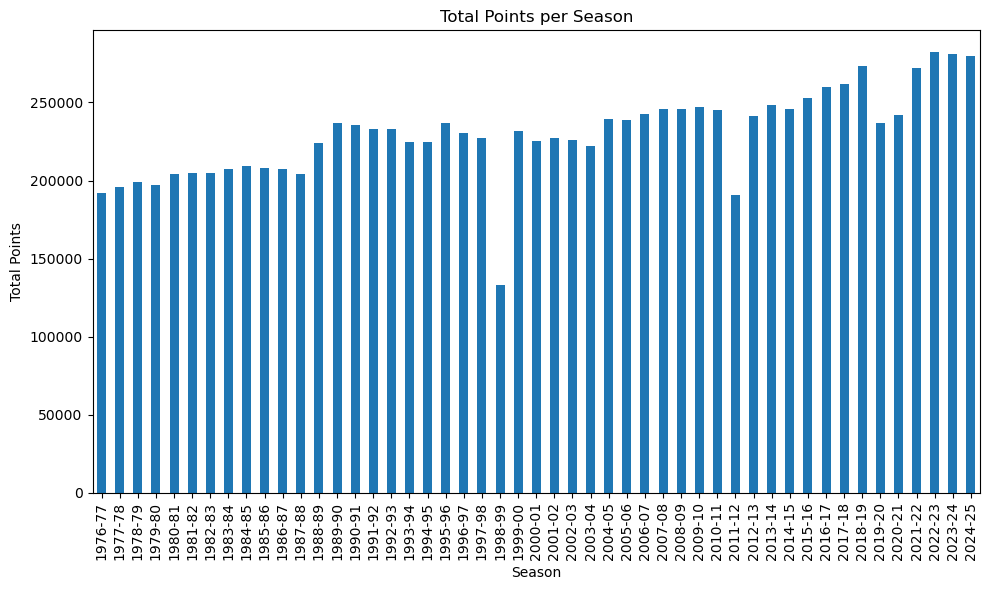

In [17]:
# Group by Season and sum Points
season_pts = df.groupby("Season")["PTS"].sum()

# Plot
season_pts.plot(kind = "bar", figsize = (10, 6))
plt.xlabel("Season")
plt.ylabel("Total Points")
plt.title("Total Points per Season")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

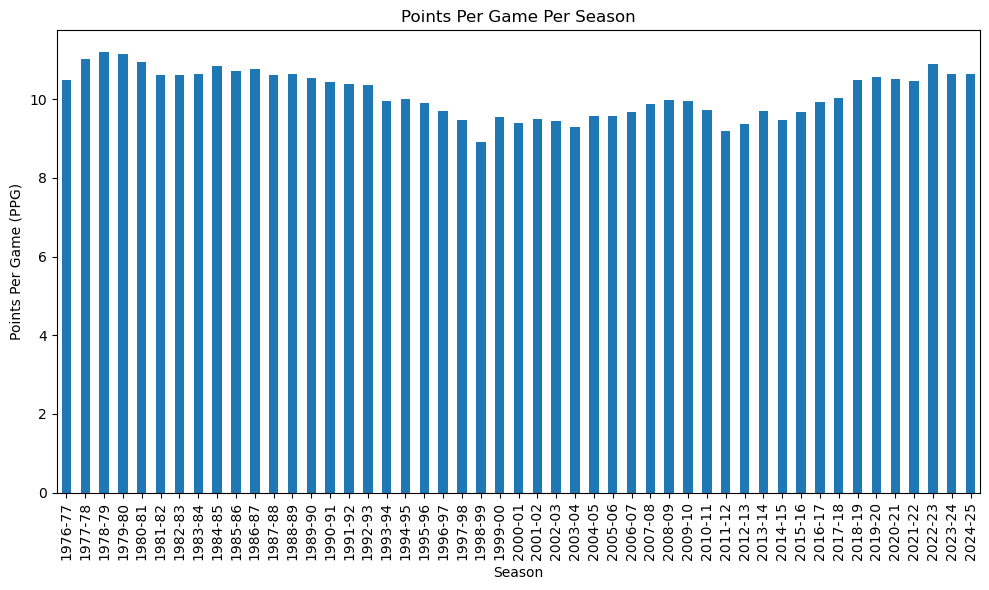

In [18]:
# Calculate points per game (PPG) per season
season_total_pts = df.groupby("Season")[["PTS", "G"]].sum()
season_ppg = season_total_pts["PTS"] / season_total_pts["G"]

# Plot
season_ppg.plot(kind = "bar", figsize = (10, 6))
plt.xlabel("Season")
plt.ylabel("Points Per Game (PPG)")
plt.title("Points Per Game Per Season")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

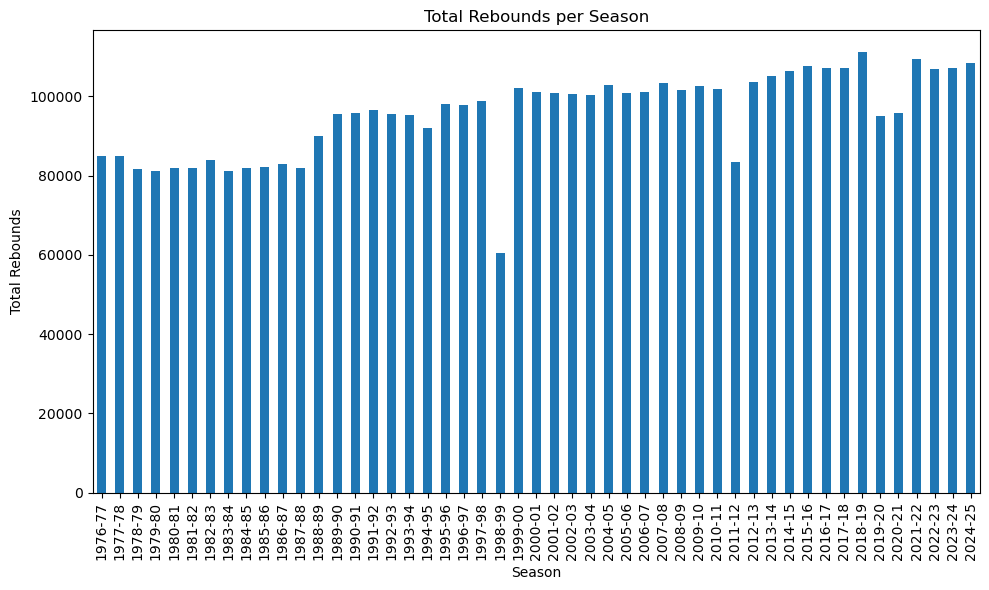

In [19]:
# Group by Season and sum Points
season_rebs = df.groupby("Season")["TRB"].sum()

# Plot
season_rebs.plot(kind = "bar", figsize = (10, 6))
plt.xlabel("Season")
plt.ylabel("Total Rebounds")
plt.title("Total Rebounds per Season")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

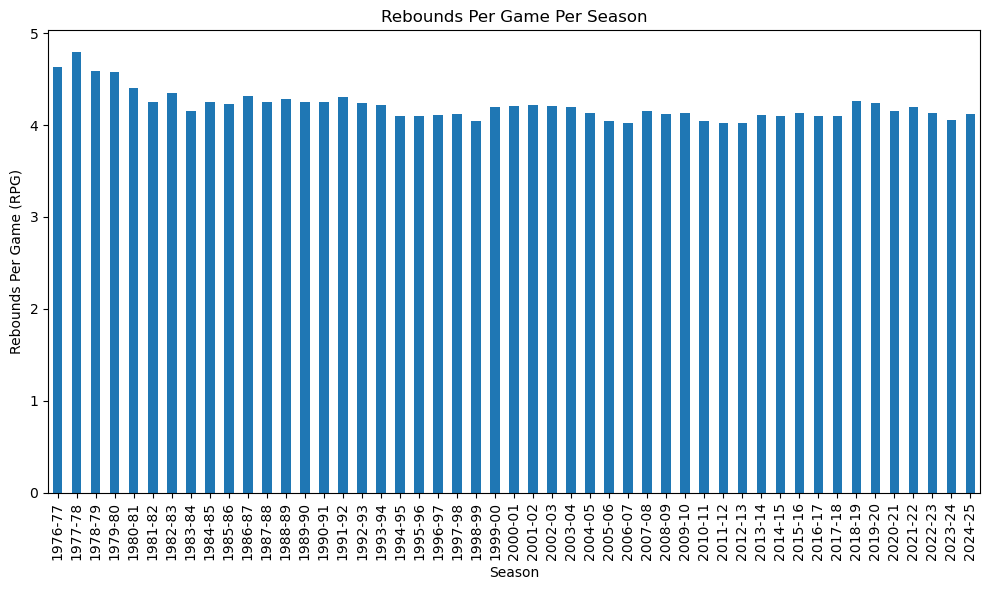

In [20]:
# Calculate rebounds per game (RPG) per season
season_total_rebs = df.groupby("Season")[["TRB", "G"]].sum()
season_rpg = season_total_rebs["TRB"] / season_total_rebs["G"]

# Plot
season_rpg.plot(kind = "bar", figsize = (10, 6))
plt.xlabel("Season")
plt.ylabel("Rebounds Per Game (RPG)")
plt.title("Rebounds Per Game Per Season")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

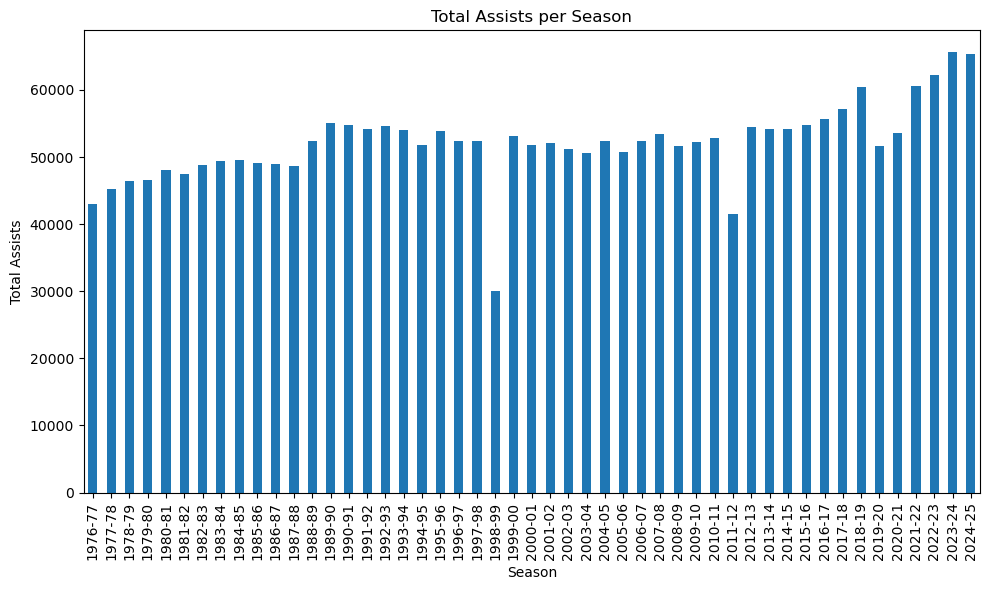

In [21]:
# Group by Season and sum Assists
season_asts = df.groupby("Season")["AST"].sum()

# Plot
season_asts.plot(kind = "bar", figsize = (10, 6))
plt.xlabel("Season")
plt.ylabel("Total Assists")
plt.title("Total Assists per Season")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

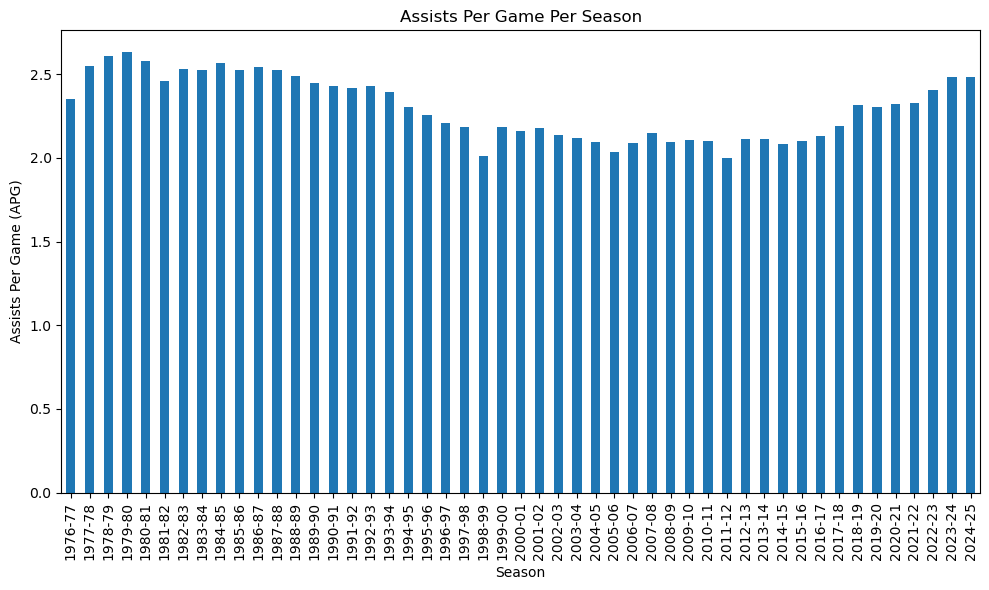

In [22]:
# Calculate assists per game (APG) per season
season_total_asts = df.groupby("Season")[["AST", "G"]].sum()
season_apg = season_total_asts["AST"] / season_total_asts["G"]

# Plot
season_apg.plot(kind = "bar", figsize = (10, 6))
plt.xlabel("Season")
plt.ylabel("Assists Per Game (APG)")
plt.title("Assists Per Game Per Season")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

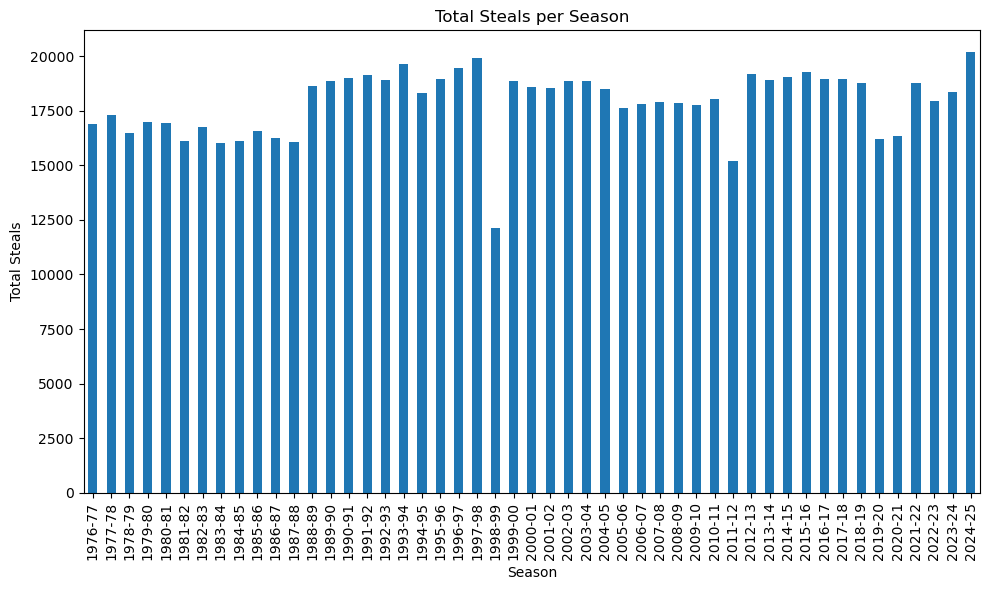

In [23]:
# Group by Season and sum Steals
season_stls = df.groupby("Season")["STL"].sum()

# Plot
season_stls.plot(kind = "bar", figsize = (10, 6))
plt.xlabel("Season")
plt.ylabel("Total Steals")
plt.title("Total Steals per Season")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

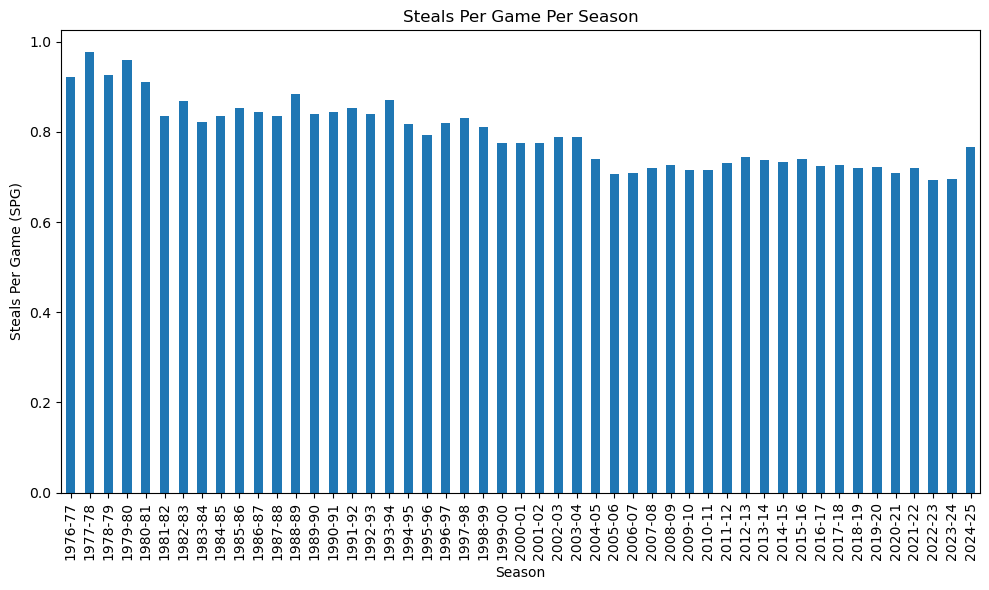

In [24]:
# Calculate steals per game (SPG) per season
season_total_stls = df.groupby("Season")[["STL", "G"]].sum()
season_spg = season_total_stls["STL"] / season_total_stls["G"]

# Plot
season_spg.plot(kind = "bar", figsize = (10, 6))
plt.xlabel("Season")
plt.ylabel("Steals Per Game (SPG)")
plt.title("Steals Per Game Per Season")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

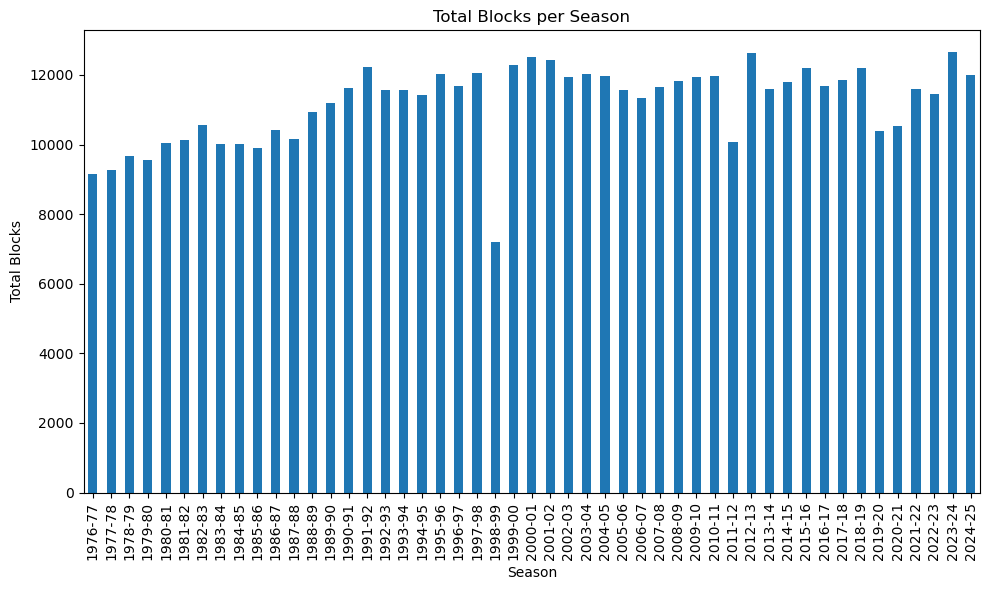

In [25]:
# Group by Season and sum Blocks
season_blks = df.groupby("Season")["BLK"].sum()

# Plot
season_blks.plot(kind = "bar", figsize = (10, 6))
plt.xlabel("Season")
plt.ylabel("Total Blocks")
plt.title("Total Blocks per Season")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

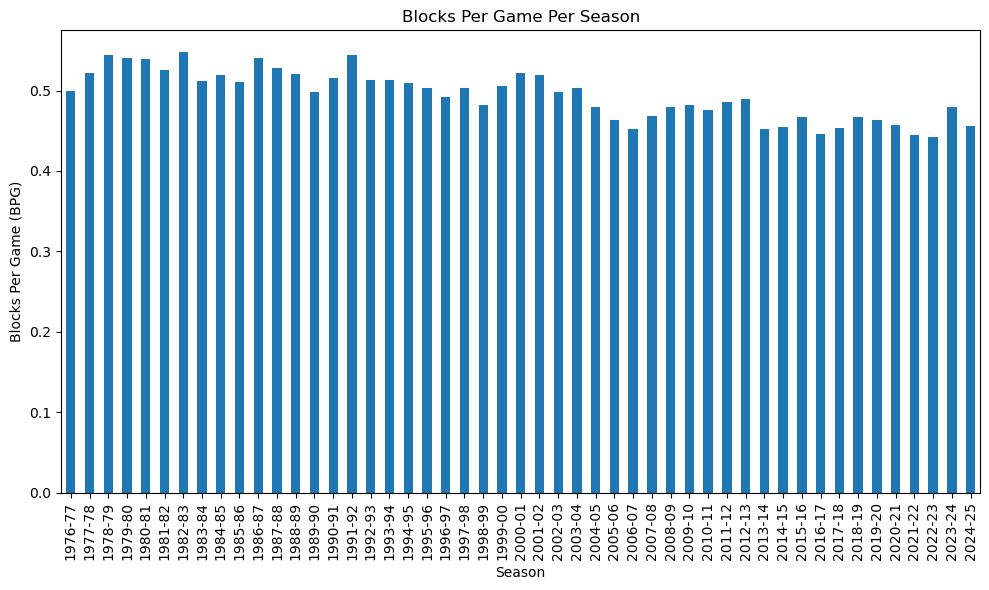

In [26]:
# Calculate blocks per game (BPG) per season
season_total_blks = df.groupby("Season")[["BLK", "G"]].sum()
season_bpg = season_total_blks["BLK"] / season_total_blks["G"]

# Plot
season_bpg.plot(kind = "bar", figsize = (10, 6))
plt.xlabel("Season")
plt.ylabel("Blocks Per Game (BPG)")
plt.title("Blocks Per Game Per Season")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

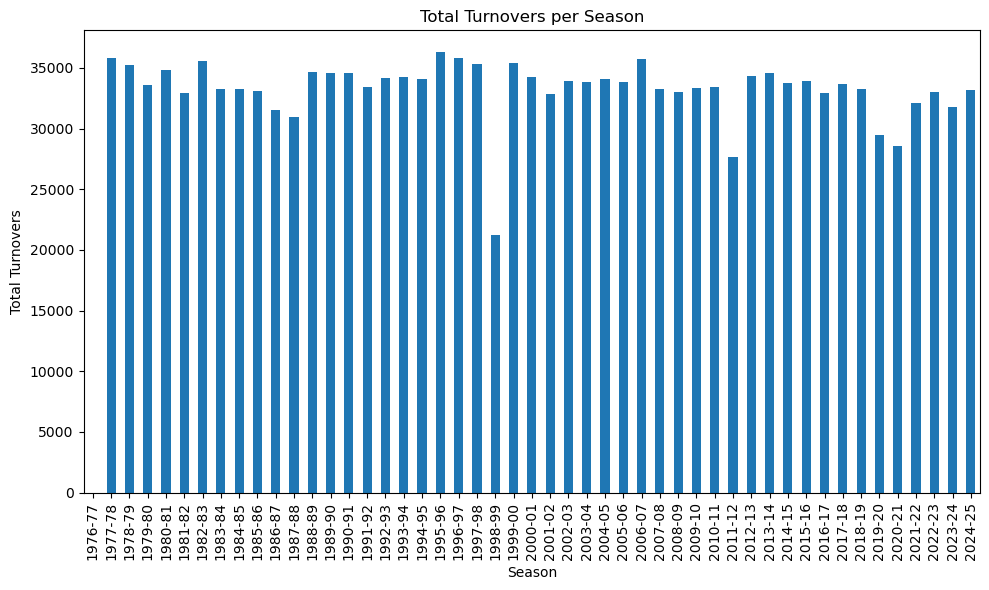

In [27]:
# Group by Season and sum Turnovers
season_tovs = df.groupby("Season")["TOV"].sum()

# Plot
season_tovs.plot(kind = "bar", figsize = (10, 6))
plt.xlabel("Season")
plt.ylabel("Total Turnovers")
plt.title("Total Turnovers per Season")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

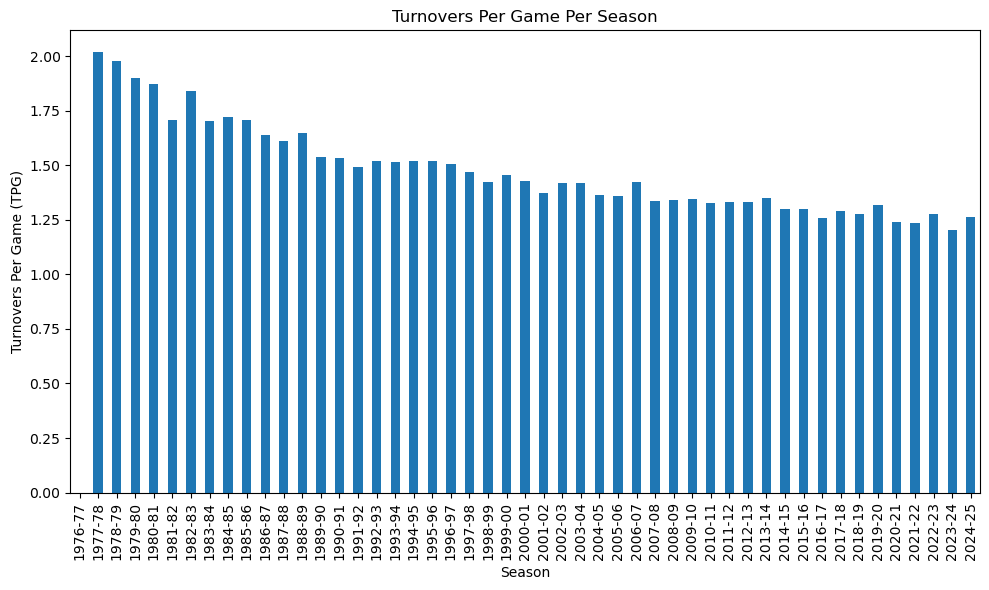

In [28]:
# Calculate blocks per game (TPG) per season
season_total_tovs = df.groupby("Season")[["TOV", "G"]].sum()
season_tpg = season_total_tovs["TOV"] / season_total_tovs["G"]

# Plot
season_tpg.plot(kind = "bar", figsize = (10, 6))
plt.xlabel("Season")
plt.ylabel("Turnovers Per Game (TPG)")
plt.title("Turnovers Per Game Per Season")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

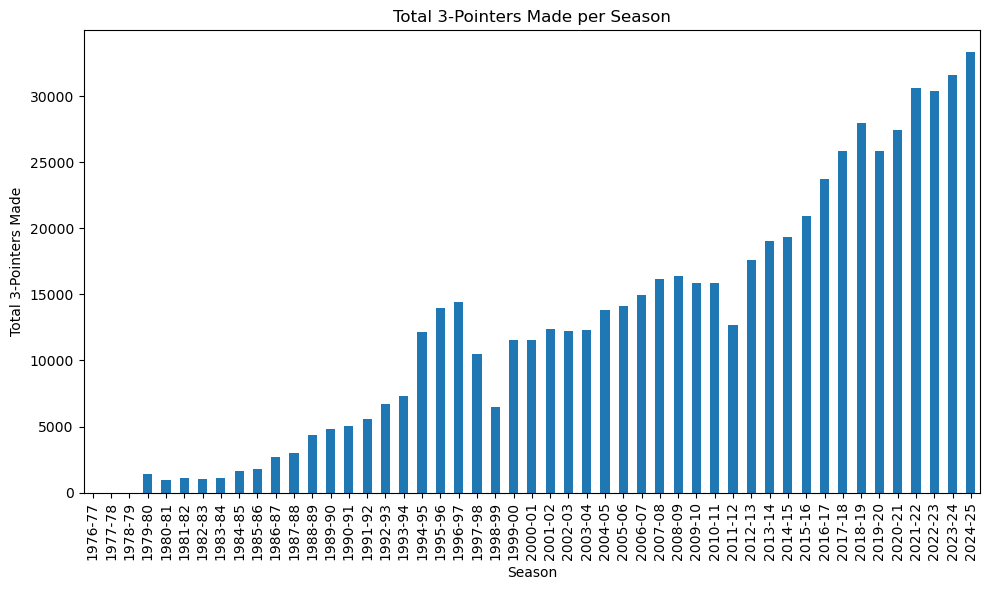

In [29]:
# Group by Season and sum 3pts
season_3pts = df.groupby("Season")["3P"].sum()

# Plot
season_3pts.plot(kind = "bar", figsize = (10, 6))
plt.xlabel("Season")
plt.ylabel("Total 3-Pointers Made")
plt.title("Total 3-Pointers Made per Season")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

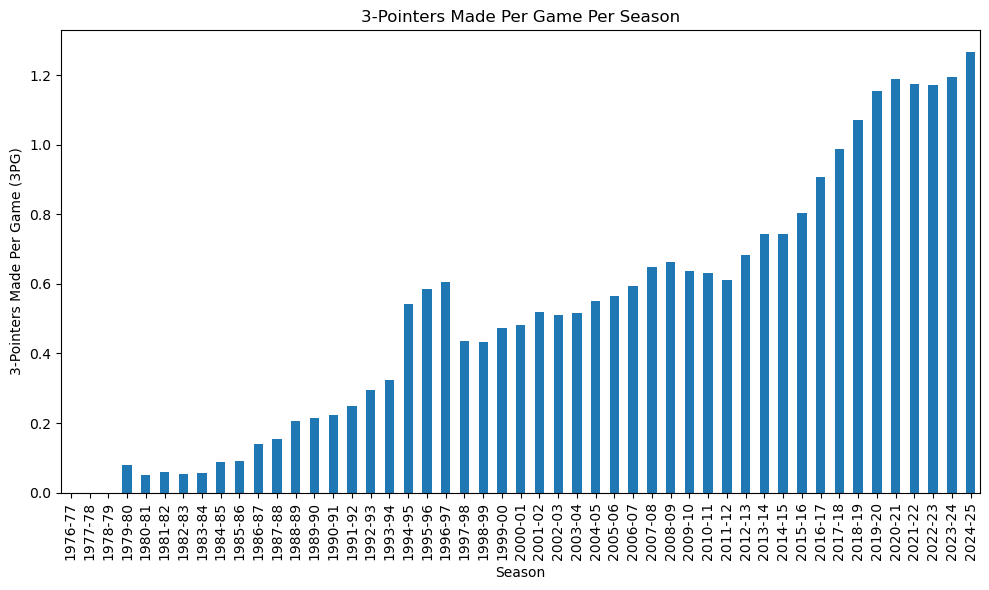

In [30]:
# Calculate 3pts per game (3PG) per season
season_total_3pts = df.groupby("Season")[["3P", "G"]].sum()
season_3pg = season_total_3pts["3P"] / season_total_3pts["G"]

# Plot
season_3pg.plot(kind = "bar", figsize = (10, 6))
plt.xlabel("Season")
plt.ylabel("3-Pointers Made Per Game (3PG)")
plt.title("3-Pointers Made Per Game Per Season")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [31]:
# All Star ratio per season
season_table = df.groupby("Season").agg(
    Total_Players=("Player", "nunique"),
    All_Stars=("All_Star", "sum")
).reset_index()

# Calculate proportion
season_table["Proportion_All_Stars"] = (
    season_table["All_Stars"] / season_table["Total_Players"]
).round(4)

season_table

,Season,Total_Players,All_Stars,Proportion_All_Stars
0,1976-77,295,26,0.0881
1,1977-78,285,24,0.0842
2,1978-79,279,23,0.0824
3,1979-80,286,24,0.0839
4,1980-81,303,23,0.0759
5,1981-82,314,25,0.0796
6,1982-83,314,24,0.0764
7,1983-84,309,25,0.0809
8,1984-85,317,25,0.0789
9,1985-86,322,25,0.0776


In [32]:
print("Min All Star:", season_table.loc[season_table["All_Stars"] > 0, "All_Stars"].min())
print("Max All Star:", season_table["All_Stars"].max())
print("Avg All Star:",season_table["All_Stars"].mean().round(0))

Min All Star: 23
Max All Star: 29
Avg All Star: 25.0


In [33]:
# Remove 1998-99 and 2011-2012 seasons which were lockouts
df = df[~df["Season"].isin(["1998-99", "2011-12"])]

<h3>Modeling</h3>

In [34]:
features = ["VORP", "PTS", "TRB", "AST", "STL", "BLK", "TOV", "TS%", "eFG%"]
X = df[features]
y = df["All_Star"]

X_name = ["VORP", "Points", "Rebounds", "Assists", "Steals", "Blocks", "Turnovers", "True Shooting %", "Effective Field Goal %"]
y_name = ["Not All Star", "All Star"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

<h3>CART Model</h3>

In [58]:
# CART
cart01 = DecisionTreeClassifier(
    criterion = "gini",
    max_leaf_nodes = 100,
    random_state = 42
).fit(X_train, y_train)

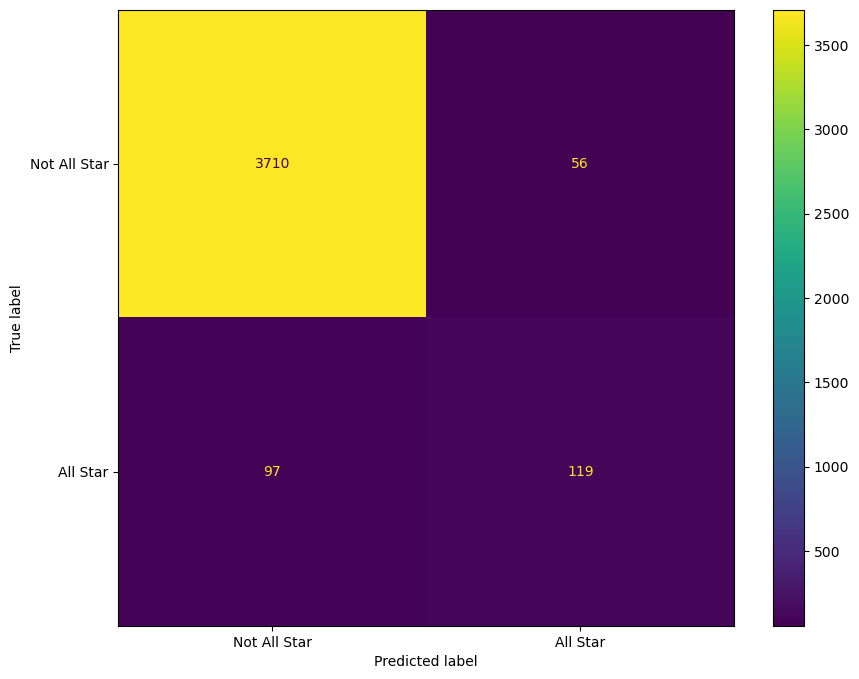

CART Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      3766
           1       0.68      0.55      0.61       216

    accuracy                           0.96      3982
   macro avg       0.83      0.77      0.79      3982
weighted avg       0.96      0.96      0.96      3982



In [59]:
# CART Predict and confusion matrix
predAS_CART = cart01.predict(X_test)

cm_CART = confusion_matrix(y_test, predAS_CART) 
cm_CART_disp = ConfusionMatrixDisplay(confusion_matrix = cm_CART, display_labels = y_name)
fig, ax = plt.subplots(figsize=(10, 8))
cm_CART_disp.plot(ax = ax)
plt.show()

# Classification report
print("CART Classification Report:\n", classification_report(y_test, predAS_CART))

In [37]:
# Feature Importance
feature_importance = pd.Series(cart01.feature_importances_, index = X.columns).sort_values(ascending = False)
print("CART Feature Importances:\n", feature_importance)

CART Feature Importances:
 VORP    0.642286
PTS     0.176992
STL     0.040413
TRB     0.034291
AST     0.026266
BLK     0.023394
TOV     0.020833
TS%     0.019668
eFG%    0.015856
dtype: float64


<h3>Random Forest</h3>

In [56]:
rfy = np.ravel(y_train)

rf01 = RandomForestClassifier(
    n_estimators = 300,
    criterion = "gini",
    max_features = "log2",
    random_state = 42
).fit(X_train, rfy)

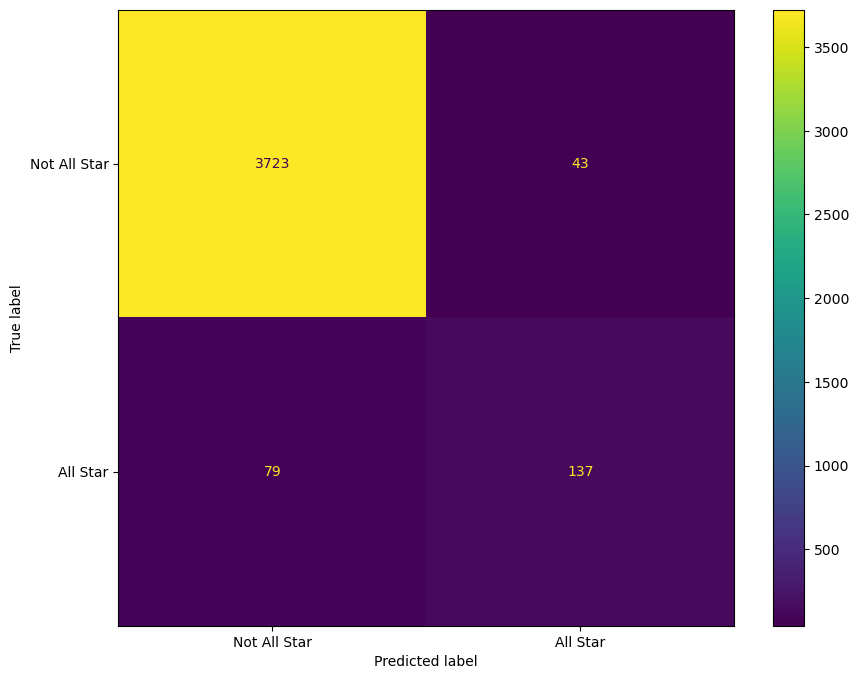

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      3766
           1       0.76      0.63      0.69       216

    accuracy                           0.97      3982
   macro avg       0.87      0.81      0.84      3982
weighted avg       0.97      0.97      0.97      3982



In [57]:
# Random Forest confusion matrix
predAS_RF = rf01.predict(X_test)

cm_RF = confusion_matrix(y_test, predAS_RF) 
cm_RF_disp = ConfusionMatrixDisplay(confusion_matrix = cm_RF, display_labels = y_name)
fig, ax = plt.subplots(figsize = (10, 8))
cm_RF_disp.plot(ax = ax)
plt.show()

# Classification report
print("Random Forest Classification Report:\n", classification_report(y_test, predAS_RF))

In [51]:
# Feature Importance
feature_importance = pd.Series(rf01.feature_importances_, index = X.columns).sort_values(ascending = False)
print("Random Forest Feature Importances:\n", feature_importance)

Random Forest Feature Importances:
 VORP    0.292676
PTS     0.237526
TOV     0.104561
TRB     0.076974
AST     0.071352
STL     0.060822
TS%     0.054784
BLK     0.051753
eFG%    0.049552
dtype: float64


<h3>2024-25 Season Evaluation</h3>

In [86]:
df_2425 = df[df["Season"] == "2024-25"].copy()
X_2425 = df_2425[features]
df_2425["Predicted_All_Star"] = rf01.predict(X_2425)
df_2425["Predicted_Prob"] = rf01.predict_proba(X_2425)[:, 1]

allstar_compare = df_2425[
    (df_2425["All_Star"] == 1) | 
    (df_2425["Predicted_All_Star"] == 1)
][["Player", "All_Star", "Predicted_All_Star", "Predicted_Prob"]]
allstar_compare = allstar_compare.sort_values(by="Predicted_Prob", ascending=False).reset_index(drop=True)
allstar_compare

,Player,All_Star,Predicted_All_Star,Predicted_Prob
0,Jayson Tatum,1,1,0.986667
1,Anthony Edwards,1,1,0.986667
2,Nikola Jokić,1,1,0.983333
3,Giannis Antetokounmpo,1,1,0.976667
4,Shai Gilgeous-Alexander,1,1,0.976667
5,LeBron James,1,1,0.976667
6,Stephen Curry,1,1,0.946667
7,Tyler Herro,1,1,0.936667
8,Cade Cunningham,1,1,0.930000
9,James Harden,1,1,0.920000


In [91]:
snubs = df_2425[
    (df_2425["All_Star"] == 0) & 
    (df_2425["Predicted_All_Star"] == 0)
][["Player", "All_Star", "Predicted_All_Star", "Predicted_Prob"]]
snubs = snubs.sort_values(by="Predicted_Prob", ascending=False).reset_index(drop=True)
snubs.head(10)

,Player,All_Star,Predicted_All_Star,Predicted_Prob
0,Austin Reaves,0,0,0.393333
1,Devin Booker,0,0,0.253333
2,Tyrese Haliburton,0,0,0.246667
3,Domantas Sabonis,0,0,0.206667
4,Zach LaVine,0,0,0.193333
5,Scottie Barnes,0,0,0.190000
6,Amen Thompson,0,0,0.180000
7,Desmond Bane,0,0,0.180000
8,Deni Avdija,0,0,0.160000
9,DeMar DeRozan,0,0,0.156667
